In [ ]:
#Loading the MNIST dataset in Keras
from tensorflow.keras.datasets import mnist

In [ ]:
#from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_images, train_labels),(test_images, test_labels)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 3d Tensor(numpy array)
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
train_images.ndim

3

In [ ]:
train_labels[0]

5

In [ ]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
#defining network strucutre

from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
num_parameters=(512*10)+10
print(num_parameters)
network.summary()

5130
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train_images = train_images.reshape((60000, 784))    # Vector data (samples, features)
train_images = train_images.astype('float32') / 255  # scaling down the image 

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255

In [ ]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# COnverting labels


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels=to_categorical(train_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_labels=to_categorical(test_labels)

In [ ]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=512)

Epoch 1/5
118/118 [==============================] - 3s 22ms/step - loss: 1.2496 - accuracy: 0.7103
Epoch 2/5
118/118 [==============================] - 4s 38ms/step - loss: 1.0881 - accuracy: 0.7461
Epoch 3/5
118/118 [==============================] - 3s 24ms/step - loss: 0.9616 - accuracy: 0.7705
Epoch 4/5
118/118 [==============================] - 3s 22ms/step - loss: 0.8622 - accuracy: 0.7904
Epoch 5/5
118/118 [==============================] - 3s 22ms/step - loss: 0.7828 - accuracy: 0.8066


In [ ]:
network.evaluate(test_images, test_labels, batch_size=128)

79/79 [==============================] - 0s 5ms/step - loss: 0.7357 - accuracy: 0.8134


[0.7356913089752197, 0.8133999705314636]

In [1]:
from tensorflow.keras.preprocessing import image

import tensorflow

In [2]:
img = image.load_img("image6.png",target_size=(28,28), grayscale=True,color_mode='grayscale')

/usr/local/lib/python3.9/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


FileNotFoundError: ignored

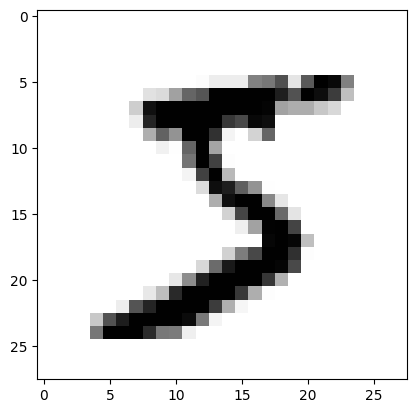

In [ ]:
digit=train_images[0].reshape(28,28)*255
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
from PIL import Image
# img= Image.open('OIP.jpg').convert('L')
# img.save('pil-greyscale.png')

In [ ]:
from skimage import color
from skimage import io
# read_image = io.imread('OIP.jpg')
# img = color.rgb2gray(read_image)
# io.imsave("pil-greyscale2.png",img)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
# img = image.load_img("pil-greyscale2.png",target_size=(128,128))

In [ ]:
img

NameError: ignored